In [3]:
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [1]:
# Routes
test_dir = '../data/raw/test'
raw_train_dir = '../data/raw/train'
processed_train_dir = '../data/processed/train'

<h4>Optimizar modelo</h4>

In [5]:
model = Sequential()

# Layer 1 - 32 filter
model.add(Conv2D(input_shape=(200, 200, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 2 - 64 filter
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 3 - 128 filter
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
trdata = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [10]:
tsdata = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


<h4>Entrenamiento del modelo</h4>

In [ ]:
history = model.fit(
    trdata,
    steps_per_epoch=trdata.samples // trdata.batch_size,
    epochs=10,
    validation_data=tsdata,
    validation_steps=tsdata.samples // tsdata.batch_size
)

In [ ]:
model.save('../models/optimized-model.keras')

<h4>Datos del entrenamiento</h4>
Duración total: 2h55m

NameError: name 'history' is not defined

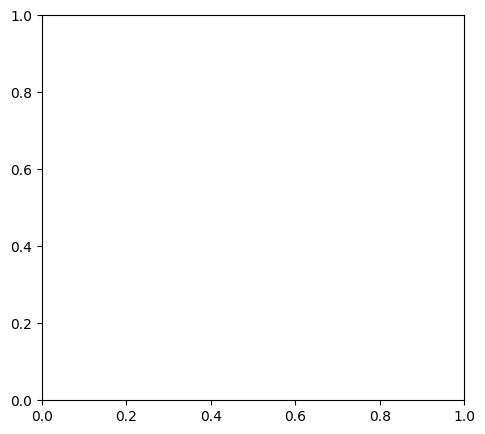

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [11]:
modelFitData = {
    'epoch1': {'accuracy': 0.5719, 'loss': 0.6667, 'val_accuracy': 0.6899, 'val_loss': 0.5799},
    'epoch2': {'accuracy': 0.6916, 'loss': 0.5822, 'val_accuracy': 0.7236, 'val_loss': 0.5479},
    'epoch3': {'accuracy': 0.7199, 'loss': 0.5419, 'val_accuracy': 0.7630, 'val_loss': 0.5018},
    'epoch4': {'accuracy': 0.7482, 'loss': 0.5098, 'val_accuracy': 0.7652, 'val_loss': 0.4845},
    'epoch5': {'accuracy': 0.7622, 'loss': 0.4871, 'val_accuracy': 0.7780, 'val_loss': 0.4667},
    'epoch6': {'accuracy': 0.7736, 'loss': 0.4686, 'val_accuracy': 0.7893, 'val_loss': 0.4545},
    'epoch7': {'accuracy': 0.7926, 'loss': 0.4381, 'val_accuracy': 0.8047, 'val_loss': 0.4261},
    'epoch8': {'accuracy': 0.7954, 'loss': 0.4347, 'val_accuracy': 0.8135, 'val_loss': 0.4100},
    'epoch9': {'accuracy': 0.8133, 'loss': 0.4093, 'val_accuracy': 0.8249, 'val_loss': 0.3946},
    'epoch10': {'accuracy': 0.8260, 'loss': 0.3882, 'val_accuracy': 0.8381, 'val_loss': 0.3620}
}

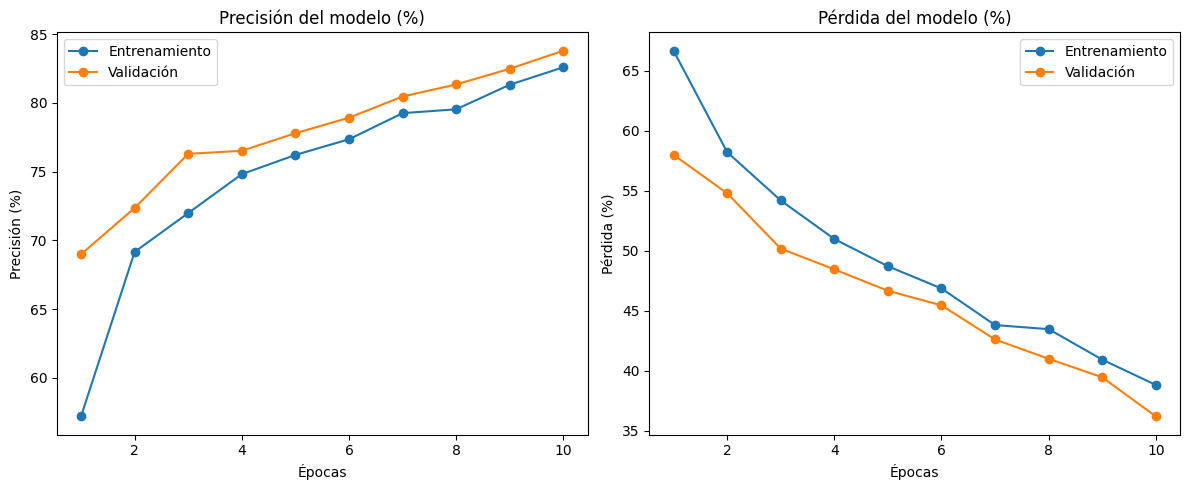

In [13]:
epochs = list(range(1, 11))
accuracy = [modelFitData[f'epoch{i}']['accuracy'] * 100 for i in epochs]
val_accuracy = [modelFitData[f'epoch{i}']['val_accuracy'] * 100 for i in epochs]
loss = [modelFitData[f'epoch{i}']['loss'] * 100 for i in epochs]
val_loss = [modelFitData[f'epoch{i}']['val_loss'] * 100 for i in epochs]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Entrenamiento', marker='o')
plt.plot(epochs, val_accuracy, label='Validación', marker='o')
plt.title('Precisión del modelo (%)')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Entrenamiento', marker='o')
plt.plot(epochs, val_loss, label='Validación', marker='o')
plt.title('Pérdida del modelo (%)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (%)')
plt.legend()

plt.tight_layout()
plt.show()